In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Veriler.csv')
df

,Kalinlik,S,M1,L,C,h,a,b
0,0.3,0,0,83.9,10.1,84.0,1.1,10.0
1,0.3,0,0,83.1,10.0,84.0,1.0,9.9
2,0.3,0,0,84.2,10.0,84.0,1.0,9.9
3,0.3,0,1,84.1,10.7,85.6,0.8,10.7
4,0.3,0,1,84.1,10.7,85.6,0.8,10.7
...,...,...,...,...,...,...,...,...
712,1.0,5,5,82.1,25.6,83.3,3.0,25.4
713,1.0,5,6,82.4,15.3,74.6,4.1,14.8
714,1.0,5,7,79.1,25.3,76.6,5.8,24.6
715,1.0,5,8,82.7,24.0,80.5,4.0,23.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Kalinlik  717 non-null    float64
 1   S         717 non-null    int64  
 2   M1        717 non-null    int64  
 3   L         717 non-null    float64
 4   C         717 non-null    float64
 5   h         717 non-null    float64
 6   a         717 non-null    float64
 7   b         717 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 44.9 KB


In [4]:
df.S.unique()

array([0, 1, 2, 3, 4, 5])

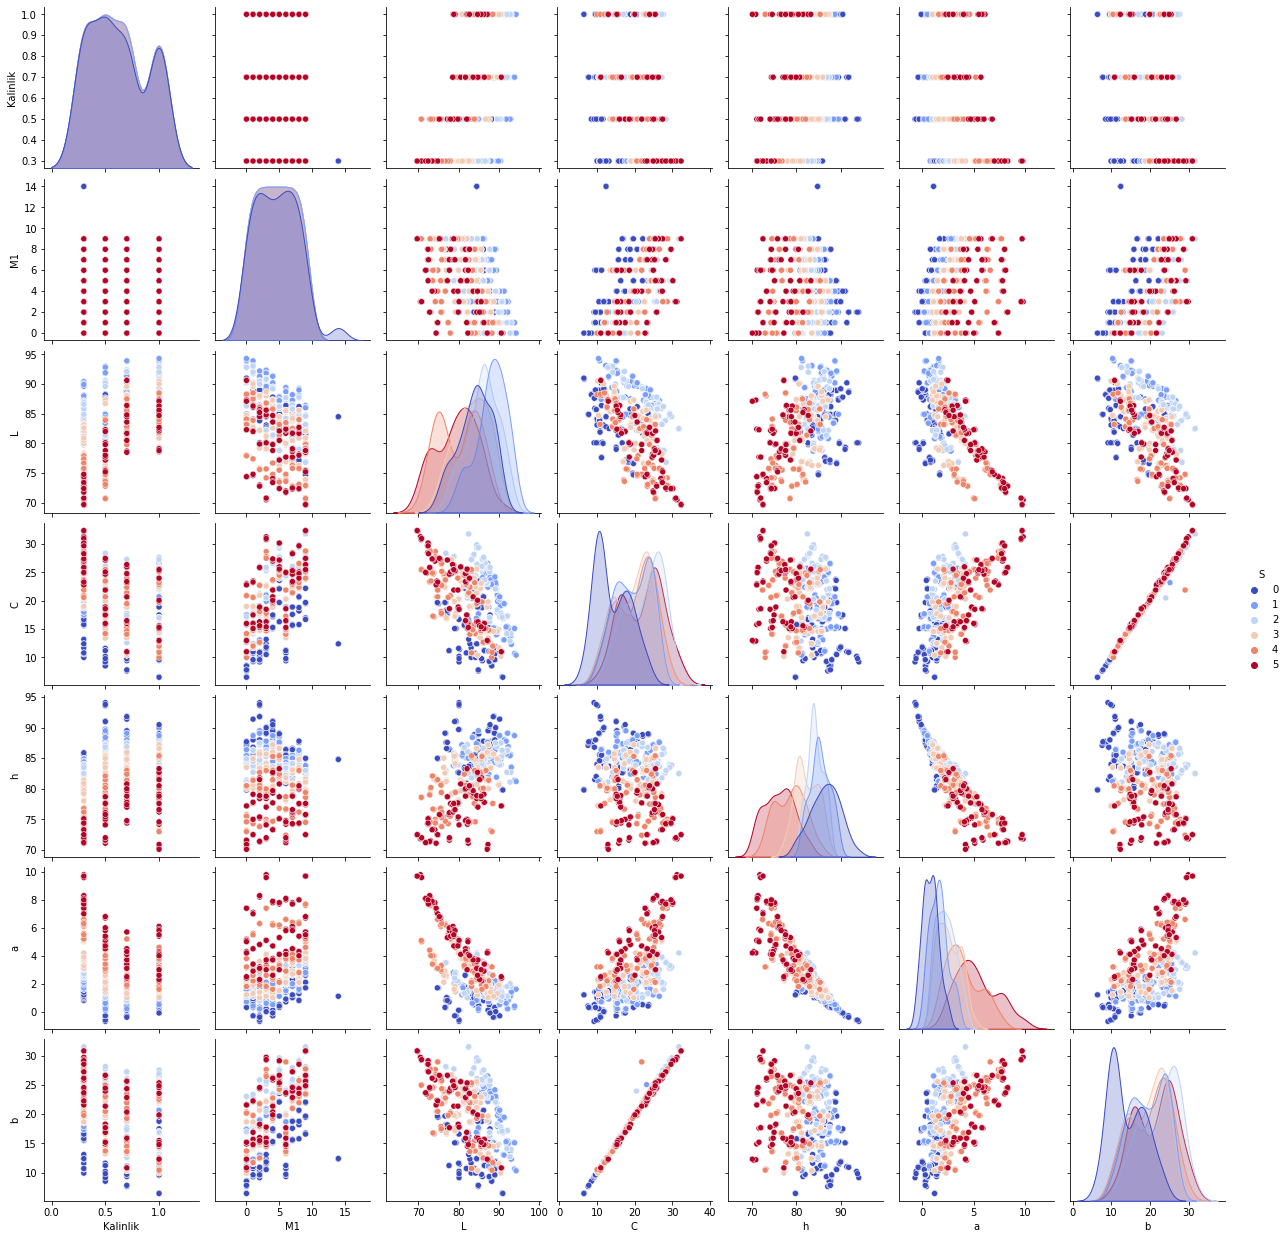

In [5]:
sns.pairplot(df, hue='S', palette='coolwarm')

<AxesSubplot:>

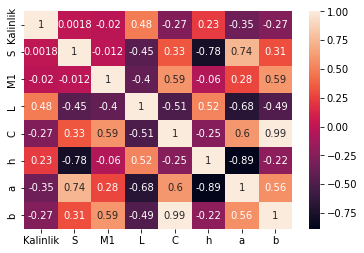

In [6]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [7]:
y = df.S.copy()
X = df.drop(['S'], axis=1)


Kalınlık kategorik bir veri olduğu için ayrık olarak kategorilendirdik. Bu sayede kalınlık bilgisi birbirinden farklı gruplarda olan verilerin tahmininde verinin kullanılabilirliğini arttırdık.

In [8]:
X

,Kalinlik,M1,L,C,h,a,b
0,0.3,0,83.9,10.1,84.0,1.1,10.0
1,0.3,0,83.1,10.0,84.0,1.0,9.9
2,0.3,0,84.2,10.0,84.0,1.0,9.9
3,0.3,1,84.1,10.7,85.6,0.8,10.7
4,0.3,1,84.1,10.7,85.6,0.8,10.7
...,...,...,...,...,...,...,...
712,1.0,5,82.1,25.6,83.3,3.0,25.4
713,1.0,6,82.4,15.3,74.6,4.1,14.8
714,1.0,7,79.1,25.3,76.6,5.8,24.6
715,1.0,8,82.7,24.0,80.5,4.0,23.6


In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# # ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
# # ct.fit(X)
# encoder = OneHotEncoder(handle_unknown='ignore')
# #perform one-hot encoding on 'team' column 
# encoder_df = pd.DataFrame(encoder.fit_transform(X[['Kalinlik']]).toarray())
# result =  X.join(encoder_df)
# result.drop(['Kalinlik'], axis=1, inplace=True)
# result.columns =  ['M1', 'L', 'C', 'h', 'a', 'b', "0", "1", "2", "3"]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [12]:
models = []
seed = 5


In [13]:
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

In [14]:
from sklearn.model_selection import cross_val_score,KFold
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.698215 (0.058738)
SVM: 0.783575 (0.040824)
LR: 0.664852 (0.048323)
DT: 0.939050 (0.025827)
RF: 0.980762 (0.021371)


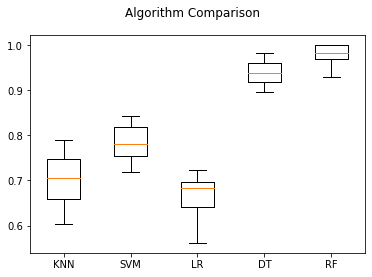

In [15]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [16]:
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [17]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
model = RandomForestClassifier()
resultGrid  = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=5, verbose=3, random_state=0)

In [18]:
results = resultGrid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600;, score=0.948 total time=   0.8s
[CV 2/5] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600;, score=0.922 total time=   0.8s
[CV 3/5] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600;, score=0.896 total time=   0.8s
[CV 4/5] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600;, score=0.930 total time=   0.8s
[CV 5/5] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600;, score=0.877 total time=   0.8s
[CV 1/5] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600;, score=0.904 total time=   2.0s
[CV 2/5] END 

In [19]:
results.best_score_

0.9301449275362318

In [20]:
results.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': False}

In [21]:
model = RandomForestClassifier(bootstrap=False, max_depth=90, max_features='auto', min_samples_leaf=1, min_samples_split=5, n_estimators=400)

In [22]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=90, min_samples_split=5,
                       n_estimators=400)

In [23]:
y_preds = model.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
cf = confusion_matrix(y_test, y_preds)

<AxesSubplot:>

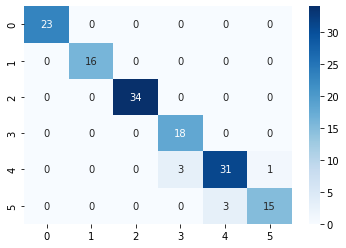

In [25]:
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues')

In [26]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [27]:
accuracy_score(y_test, y_preds)

0.9513888888888888

In [28]:
recall_score(y_test, y_preds,average='weighted')

0.9513888888888888

In [29]:
precision_score(y_test, y_preds,average='weighted')

0.9528842787114845

In [30]:
f1_score(y_test, y_preds,average='weighted')

0.9510209230477772

In [31]:
import pickle as pckl

In [32]:
pckl.dump(model, open('model.pkl','wb'))
pckl.dump(sc, open('sc.pkl','wb'))